# 200643540_ST3189

# Unsupervised Learning

Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

np.random.seed(0)

Importing the dataset

Link to the dataset - https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

In [2]:
df = pd.read_csv("BankNote_Authentication.csv")

Learn the shape and object types of the data

In [3]:
df.shape

(1372, 5)

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Dropping the class labels since the first model is unsupervised

In [5]:
df = df.drop(['class'], axis=1)

In [6]:
df.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


Checking for null values

In [8]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

### Exploratory Data Analysis (EDA)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495


Plotting pairwise relationships in the dataset

In [10]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

<Figure size 1080x720 with 0 Axes>

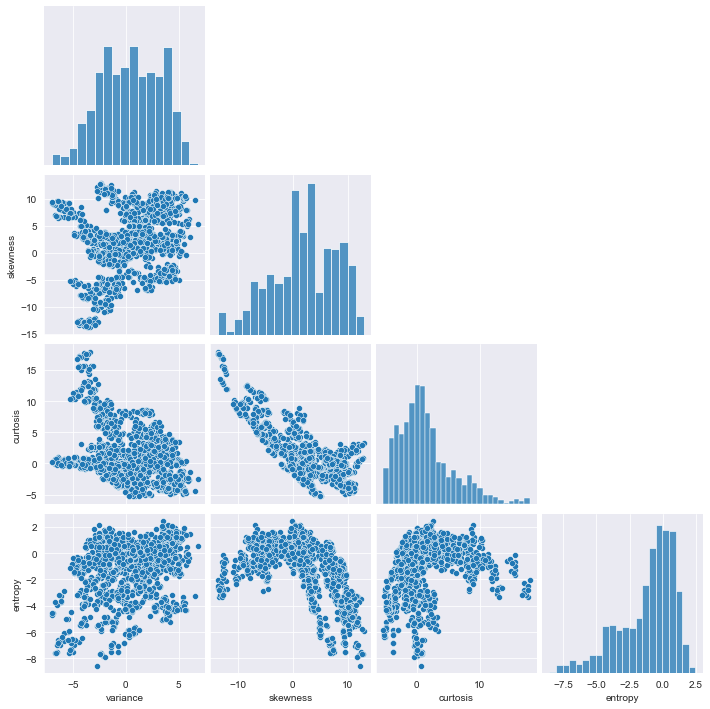

In [11]:
cols = ['variance', 'skewness', 'curtosis', 'entropy']
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
fig = sns.pairplot(df[cols], corner=True)
plt.show()

Checking for correlation

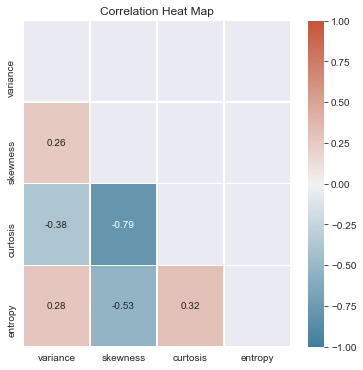

In [12]:
plt.figure(figsize=(6,6))
plt.title("Correlation Heat Map")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = sns.heatmap(corr, annot=True,linewidth=.5,mask=mask,vmax=1, vmin=-1, center=0, cmap=cmap)
plt.show()

Plotting the distribution of data points within features

<AxesSubplot:>

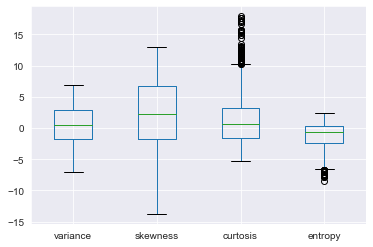

In [13]:
df.boxplot()

<AxesSubplot:>

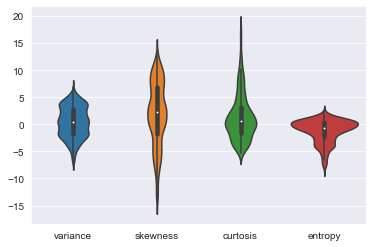

In [14]:
sns.violinplot(data=df)

Scaling the numeric features

In [15]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

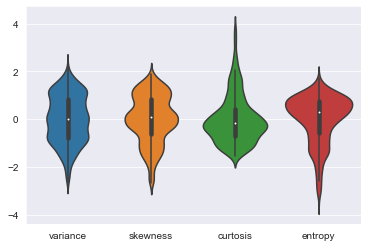

In [16]:
sns.violinplot(data=df_scaled)
x=[0,1,2,3]
labels = ['variance', 'skewness', 'curtosis', 'entropy']
plt.xticks(x,labels)
plt.show()

Using the elbow method to determine the number of clusters (value of k)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


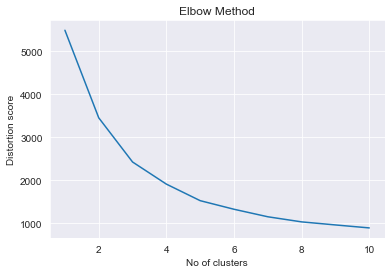

In [17]:
ws=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    ws.append(kmeans.inertia_)
sns.lineplot(range(1, 11),ws) 
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("Distortion score")
plt.show()

### K-Means

In [18]:
kmeans = KMeans(n_clusters=2,random_state=0)
km_fit = kmeans.fit(df_scaled)

In [19]:
predict = kmeans.fit_predict(df_scaled )
predict

array([1, 1, 0, ..., 0, 0, 0])

In [20]:
new_df=df.copy()
new_df['Cluster'] = predict
new_df.head()

,variance,skewness,curtosis,entropy,Cluster
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,0


Visualising the clusters 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


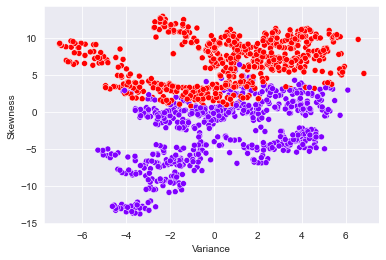

In [21]:
sns.scatterplot(new_df['variance'],new_df['skewness'],c=new_df['Cluster'],cmap='rainbow')
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3,random_state=0)
km3_fit = kmeans.fit(df_scaled)

In [23]:
predict = kmeans.fit_predict(df_scaled )
predict

array([0, 0, 0, ..., 2, 2, 0])

In [24]:
new_df['3 Clusters'] = predict
new_df.head()

,variance,skewness,curtosis,entropy,Cluster,3 Clusters
0,3.62160,8.6661,-2.8073,-0.44699,1,0
1,4.54590,8.1674,-2.4586,-1.46210,1,0
2,3.86600,-2.6383,1.9242,0.10645,0,0
3,3.45660,9.5228,-4.0112,-3.59440,1,1
4,0.32924,-4.4552,4.5718,-0.98880,0,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


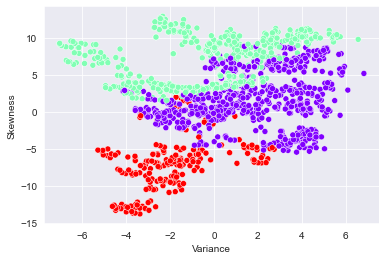

In [25]:
sns.scatterplot(new_df['variance'],new_df['skewness'],c=new_df['3 Clusters'],cmap='rainbow')
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4,random_state=0)
km4_fit = kmeans.fit(df_scaled)

In [27]:
predict = kmeans.fit_predict(df_scaled )
predict

array([1, 1, 0, ..., 2, 2, 0])

In [28]:
new_df['4 Clusters'] = predict
new_df.head()

,variance,skewness,curtosis,entropy,Cluster,3 Clusters,4 Clusters
0,3.62160,8.6661,-2.8073,-0.44699,1,0,1
1,4.54590,8.1674,-2.4586,-1.46210,1,0,1
2,3.86600,-2.6383,1.9242,0.10645,0,0,0
3,3.45660,9.5228,-4.0112,-3.59440,1,1,1
4,0.32924,-4.4552,4.5718,-0.98880,0,2,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


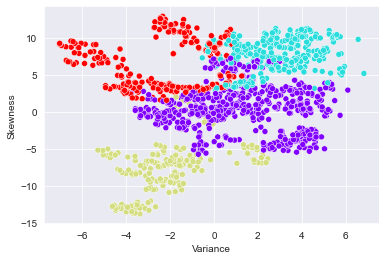

In [29]:
sns.scatterplot(new_df['variance'],new_df['skewness'],c=new_df['4 Clusters'],cmap='rainbow')
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

### Principal Component Analysis (PCA)

In [30]:
pca = PCA()
pca.fit(df_scaled)
df_pca = pca.fit_transform(df_scaled)

Determining number of components to include using explained variance ratio

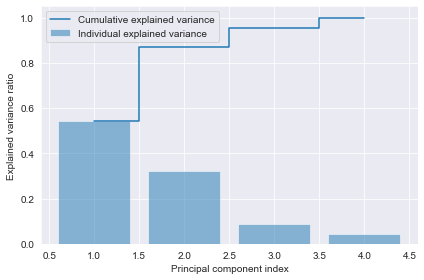

In [31]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(1, len(df.columns)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(df.columns)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
pca = PCA(n_components = 2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [33]:
df_pca.shape

(1372, 2)

Using the inertia to determine the number of clusters post PCA (value of k)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


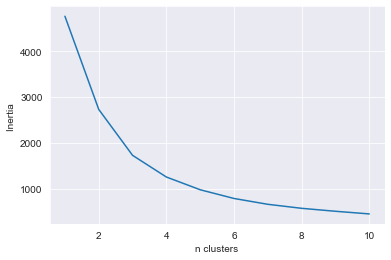

In [34]:
inertia = []
n_clusters = 10

for n in range(1, n_clusters+1):
    model = KMeans(n)
    model.fit(df_pca)
    inertia.append(model.inertia_)  

n_cluster = range(1,n_clusters+1)
sns.lineplot(n_cluster,inertia)
plt.xlabel('n clusters')
plt.ylabel('Inertia ')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmpca_fit=kmeans.fit(df_pca)

Adding the predicted clusters to the dataframe

In [36]:
predict_pca = kmeans.fit_predict(df_pca)
predict_pca

array([0, 0, 1, ..., 1, 1, 1])

In [37]:
new_df['Cluster_pca'] = predict_pca
new_df.head()

,variance,skewness,curtosis,entropy,Cluster,3 Clusters,4 Clusters,Cluster_pca
0,3.62160,8.6661,-2.8073,-0.44699,1,0,1,0
1,4.54590,8.1674,-2.4586,-1.46210,1,0,1,0
2,3.86600,-2.6383,1.9242,0.10645,0,0,0,1
3,3.45660,9.5228,-4.0112,-3.59440,1,1,1,0
4,0.32924,-4.4552,4.5718,-0.98880,0,2,0,1


Visualising the clusters post PCA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


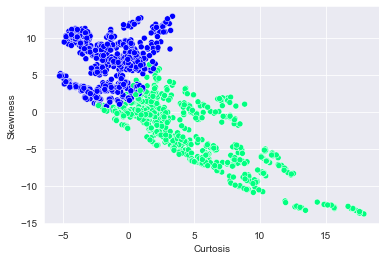

In [38]:
sns.scatterplot(new_df['curtosis'],new_df['skewness'],c = new_df['Cluster_pca'],cmap = 'winter')
plt.xlabel("Curtosis")
plt.ylabel("Skewness")
plt.show()

Cluster evaluation 

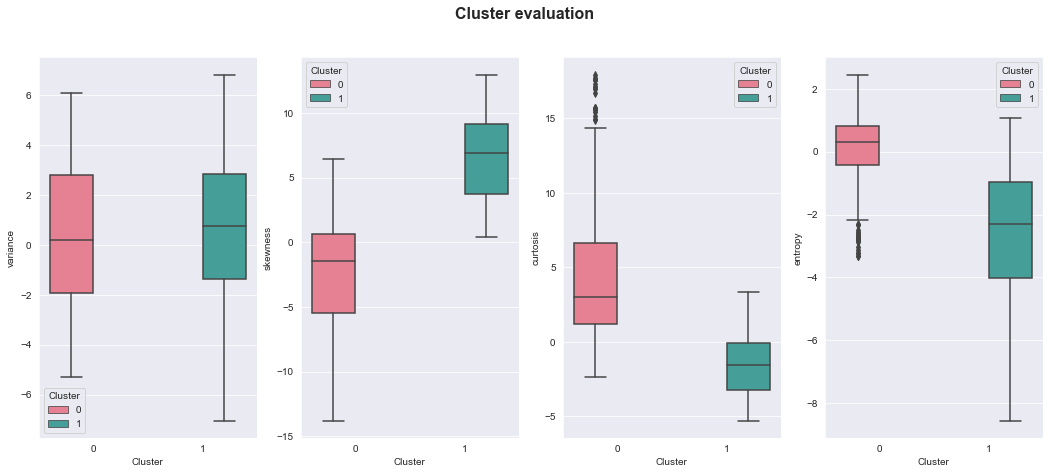

In [39]:
fig, ax =plt.subplots(1,4)
fig.suptitle('Cluster evaluation', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
sns.boxplot(x = new_df['Cluster'],
            y = new_df['variance'],
            hue = new_df['Cluster'],
            palette = 'husl', ax=ax[0])
sns.boxplot(x = new_df['Cluster'],
            y = new_df['skewness'],
            hue = new_df['Cluster'],
            palette = 'husl', ax=ax[1])
sns.boxplot(x = new_df['Cluster'],
            y = new_df['curtosis'],
            hue = new_df['Cluster'],
            palette = 'husl', ax=ax[2])
sns.boxplot(x = new_df['Cluster'],
            y = new_df['entropy'],
            hue = new_df['Cluster'],
            palette = 'husl', ax=ax[3])

plt.show()

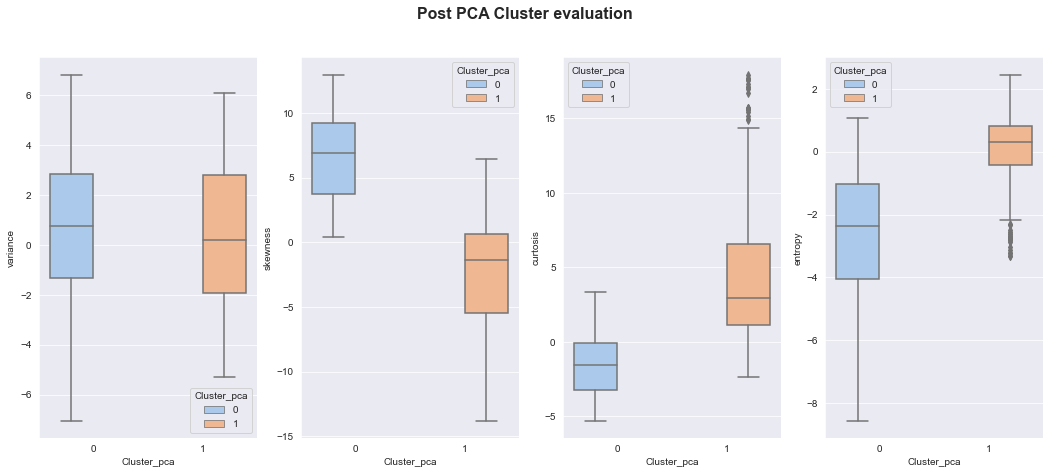

In [40]:
fig, ax =plt.subplots(1,4)
fig.suptitle('Post PCA Cluster evaluation', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
sns.boxplot(x = new_df['Cluster_pca'],
            y = new_df['variance'],
            hue = new_df['Cluster_pca'],
            palette = 'pastel', ax=ax[0])
sns.boxplot(x = new_df['Cluster_pca'],
            y = new_df['skewness'],
            hue = new_df['Cluster_pca'],
            palette = 'pastel', ax=ax[1])
sns.boxplot(x = new_df['Cluster_pca'],
            y = new_df['curtosis'],
            hue = new_df['Cluster_pca'],
            palette = 'pastel', ax=ax[2])
sns.boxplot(x = new_df['Cluster_pca'],
            y = new_df['entropy'],
            hue = new_df['Cluster_pca'],
            palette = 'pastel', ax=ax[3])

plt.show()

# Classification

Fully reset the namespace carried forward from the previous model

In [41]:
%reset -f

Importing the libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

np.random.seed(0)

Importing the dataset

In [43]:
df=pd.read_csv("BankNote_Authentication.csv")

In [44]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

### Exploratory Data Analysis (EDA)

In [45]:
df['class'].value_counts(normalize=True).mul(100).round(0).astype(str) + '%'

0    56.0%
1    44.0%
Name: class, dtype: object

Dataset was checked for null values and most parts of the EDA were done during the building of the previous model using the same dataset

<AxesSubplot:xlabel='class', ylabel='entropy'>

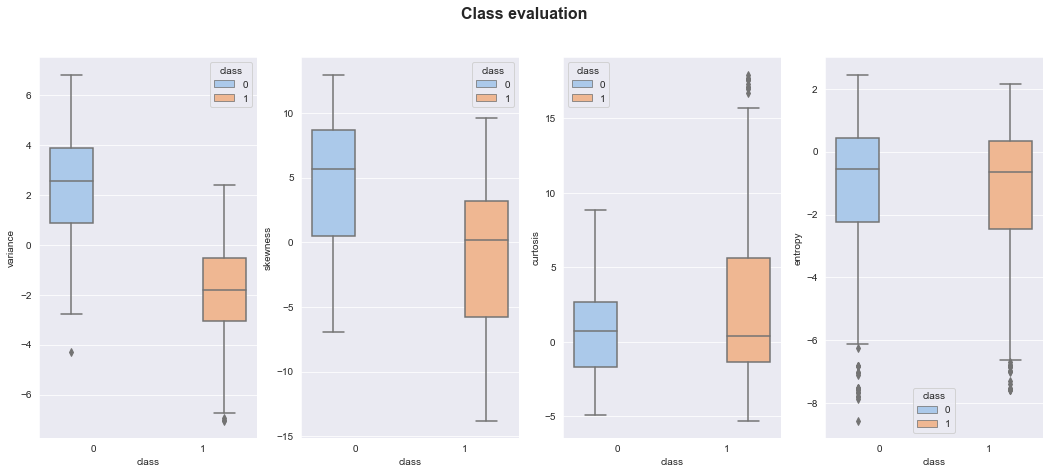

In [46]:
sns.set_style("darkgrid")
fig, ax =plt.subplots(1,4)
fig.suptitle('Class evaluation', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)

sns.boxplot(x = df['class'],
            y = df['variance'],
            hue = df['class'],
            palette = 'pastel', ax=ax[0])
sns.boxplot(x = df['class'],
            y = df['skewness'],
            hue = df['class'],
            palette = 'pastel', ax=ax[1])
sns.boxplot(x = df['class'],
            y = df['curtosis'],
            hue = df['class'],
            palette = 'pastel', ax=ax[2])
sns.boxplot(x = df['class'],
            y = df['entropy'],
            hue = df['class'],
            palette = 'pastel', ax=ax[3])

Splitting the dataset into features and labels

In [47]:
features = df.drop(['class'], axis=1) 
labels = df['class']

In [48]:
features.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [49]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

Set Training and Testing Data

In [50]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [51]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (1097, 4)
Shape of testing feature: (275, 4)
Shape of training label: (1097,)
Shape of testing label: (275,)


Scaling the numeric features

In [52]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(x_train)

x_train_scaled = std_scaler.transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

Defining a function for model evaluation

In [53]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Gaussian Naive Bayes

In [54]:
GNB = GaussianNB()

In [55]:
GNB.fit(x_train_scaled, y_train)

GaussianNB()

In [56]:
# Evaluate Model
GNB_eval = evaluate_model(GNB, x_test_scaled, y_test)

# Print result
print('Accuracy:', GNB_eval['acc'])
print('Precision:', GNB_eval['prec'])
print('Recall:', GNB_eval['rec'])
print('F1 Score:', GNB_eval['f1'])
print('Cohens Kappa Score:',GNB_eval['kappa'])
print('Area Under Curve:', GNB_eval['auc'])
print('Confusion Matrix:\n', GNB_eval['cm'])

Accuracy: 0.8327272727272728
Precision: 0.8050847457627118
Recall: 0.8050847457627118
F1 Score: 0.8050847457627118
Cohens Kappa Score: 0.6585879304760878
Area Under Curve: 0.9387347511605312
Confusion Matrix:
 [[134  23]
 [ 23  95]]


### Decision Tree

In [57]:
DT = DecisionTreeClassifier()

In [58]:
DT.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

Visualising the tree

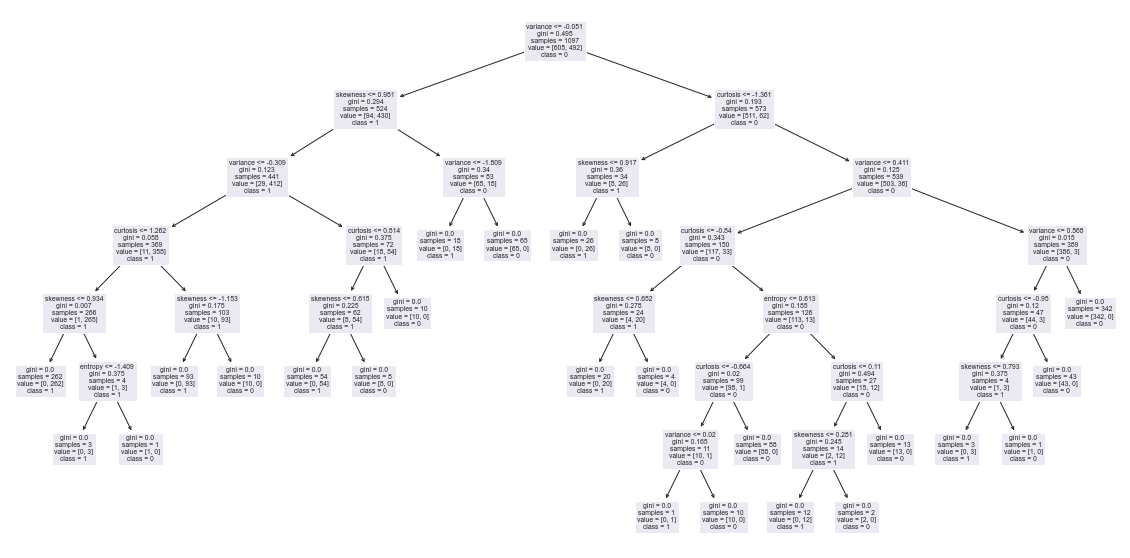

In [59]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(DT, 
          feature_names=features.columns,
          class_names=['0','1'])

In [60]:
# Evaluate Model
DT_eval = evaluate_model(DT, x_test_scaled, y_test)

# Print result
print('Accuracy:', DT_eval['acc'])
print('Precision:', DT_eval['prec'])
print('Recall:', DT_eval['rec'])
print('F1 Score:', DT_eval['f1'])
print('Cohens Kappa Score:',DT_eval['kappa'])
print('Area Under Curve:', DT_eval['auc'])
print('Confusion Matrix:\n', DT_eval['cm'])

Accuracy: 0.9927272727272727
Precision: 0.9833333333333333
Recall: 1.0
F1 Score: 0.9915966386554621
Cohens Kappa Score: 0.9851871801777539
Area Under Curve: 0.9936305732484076
Confusion Matrix:
 [[155   2]
 [  0 118]]


###  Logistic Regression

In [61]:
LR = LogisticRegression()

In [62]:
LR.fit(x_train_scaled, y_train)

LogisticRegression()

In [63]:
# Evaluate Model
LR_eval = evaluate_model(LR, x_test_scaled, y_test)

# Print result
print('Accuracy:', LR_eval['acc'])
print('Precision:', LR_eval['prec'])
print('Recall:', LR_eval['rec'])
print('F1 Score:', LR_eval['f1'])
print('Cohens Kappa Score:',LR_eval['kappa'])
print('Area Under Curve:', LR_eval['auc'])
print('Confusion Matrix:\n', LR_eval['cm'])

Accuracy: 0.9890909090909091
Precision: 0.9752066115702479
Recall: 1.0
F1 Score: 0.9874476987447699
Cohens Kappa Score: 0.977804084048535
Area Under Curve: 0.9998920436143798
Confusion Matrix:
 [[154   3]
 [  0 118]]


### Neural Network

In [64]:
NN = MLPClassifier()

In [65]:
NN.fit(x_train_scaled, y_train)

MLPClassifier()

In [66]:
# Evaluate Model
NN_eval = evaluate_model(NN, x_test_scaled, y_test)

# Print result
print('Accuracy:', NN_eval['acc'])
print('Precision:', NN_eval['prec'])
print('Recall:', NN_eval['rec'])
print('F1 Score:', NN_eval['f1'])
print('Cohens Kappa Score:',NN_eval['kappa'])
print('Area Under Curve:', NN_eval['auc'])
print('Confusion Matrix:\n', NN_eval['cm'])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohens Kappa Score: 1.0
Area Under Curve: 1.0
Confusion Matrix:
 [[157   0]
 [  0 118]]


### Model Comparison

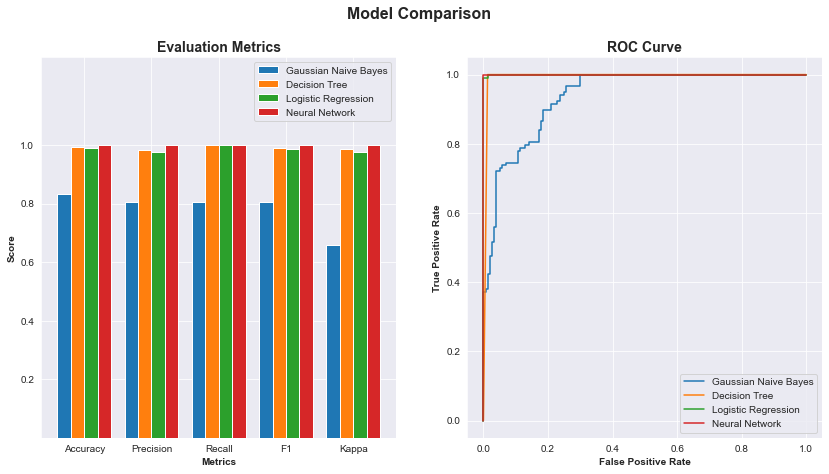

In [67]:
# Intitialize figure with two plots
sns.set_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
GNB_score = [GNB_eval['acc'], GNB_eval['prec'], GNB_eval['rec'], GNB_eval['f1'], GNB_eval['kappa']]
DT_score = [DT_eval['acc'], DT_eval['prec'], DT_eval['rec'], DT_eval['f1'], DT_eval['kappa']]
LR_score = [LR_eval['acc'], LR_eval['prec'], LR_eval['rec'], LR_eval['f1'], LR_eval['kappa']]
NN_score = [NN_eval['acc'], NN_eval['prec'], NN_eval['rec'], NN_eval['f1'], NN_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(GNB_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, GNB_score, width=barWidth, edgecolor='white', label='Gaussian Naive Bayes')
ax1.bar(r2, DT_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, LR_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, NN_score, width=barWidth, edgecolor='white', label='Neural Network')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(DT_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
y=[0.2,0.4,0.6,0.8,1.0]
ax1.set_yticks(y)
ax1.set_ylim(0, 1.3)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

# Second plot
## Comparing ROC Curve
ax2.plot(GNB_eval['fpr'], GNB_eval['tpr'], label='Gaussian Naive Bayes')
ax2.plot(DT_eval['fpr'], DT_eval['tpr'], label='Decision Tree')
ax2.plot(LR_eval['fpr'], LR_eval['tpr'], label='Logistic Regression')
ax2.plot(NN_eval['fpr'], NN_eval['tpr'], label='Neural Network')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)


plt.show()

# Regression

Fully reset the namespace carried forward from the previous model

In [68]:
%reset -f

Importing the libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics, linear_model
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold 

Importing the dataset

Link to the dataset - https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [70]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Learn the shape and object types of the data

In [71]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [72]:
df.shape

(48204, 9)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Checking for null values

In [74]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [76]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

### Feature Engineering

Splitting timestamp column into separate year, month, day and hour columns

In [77]:
df['date_time']= pd.to_datetime(df['date_time'])
df['date_time_year'] = df['date_time'].dt.year
df['date_time_month'] = df['date_time'].dt.month
df['date_time_day'] = df['date_time'].dt.day
df['date_time_hour'] = df['date_time'].dt.hour
df= df.drop(['date_time'], axis=1)

### Exploratory Data Analysis (EDA)

Plotting the distribution of target

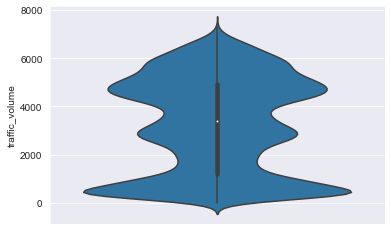

In [78]:
sns.set_style("darkgrid")
sns.violinplot(y=df['traffic_volume'])
plt.show()

Plotting yearly traffic volume data 

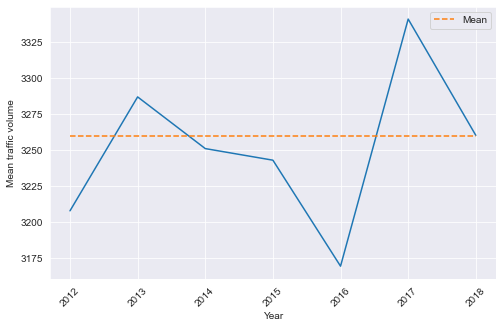

In [79]:
traffic_byyear = df.groupby('date_time_year')['traffic_volume'].mean()
y_mean = df['traffic_volume'].mean()

fig,ax = plt.subplots(figsize = (8, 5))

sns.lineplot(ax=ax, x = traffic_byyear.index, y = traffic_byyear.values)
sns.lineplot(ax=ax, x = traffic_byyear.index, y = y_mean, label='Mean', linestyle='--')
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("Mean traffic volume")
plt.show()

Plotting monthly traffic volume data

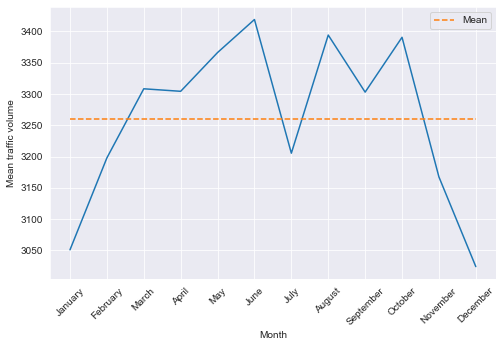

In [80]:
traffic_bymonth = df.groupby('date_time_month')['traffic_volume'].mean()
traffic_bymonth.rename({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)

fig,ax = plt.subplots(figsize = (8, 5))


pal = sns.color_palette("coolwarm", len(traffic_bymonth.values))
rank = traffic_bymonth.values.argsort().argsort() 

sns.lineplot(ax=ax, x = traffic_bymonth.index, y = traffic_bymonth.values)
sns.lineplot(ax=ax, x = traffic_bymonth.index, y = y_mean, label='Mean', linestyle='--')
plt.xticks(rotation = 45)
plt.xlabel("Month")
plt.ylabel("Mean traffic volume")
plt.show()

Plotting hourly traffic volume data

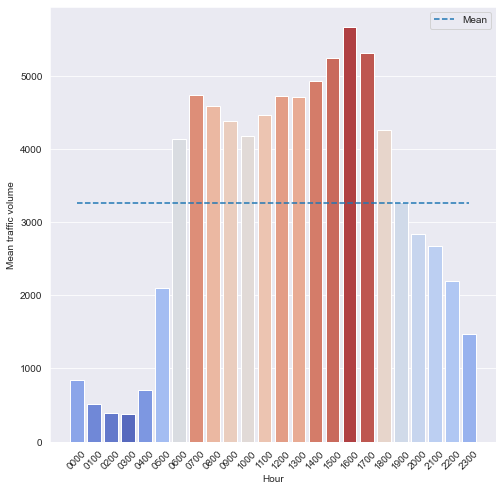

In [81]:
traffic_byhour = df.groupby('date_time_hour')['traffic_volume'].mean()
traffic_byhour.rename({0:'0000', 1:'0100', 2:'0200', 3:'0300', 4:'0400', 5:'0500', 6:'0600', 7:'0700', 8:'0800', 9:'0900', 10:'1000', 11:'1100', 12:'1200',13:'1300', 14:'1400', 15:'1500', 16:'1600', 17:'1700', 18:'1800', 19:'1900', 20:'2000', 21:'2100', 22:'2200', 23:'2300'}, inplace = True)

fig,ax = plt.subplots(figsize = (8, 8))

pal = sns.color_palette("coolwarm", len(traffic_byhour.values))
rank = traffic_byhour.values.argsort().argsort() 

sns.barplot(ax=ax, x = traffic_byhour.index, y = traffic_byhour.values, palette=np.array(pal)[rank])
sns.lineplot(ax=ax, x = traffic_byhour.index, y = y_mean, label='Mean', linestyle='--')
plt.xticks(rotation = 45)
plt.xlabel("Hour")
plt.ylabel("Mean traffic volume")
plt.show()

Encoding the holiday column

In [82]:
df['holiday'].value_counts()

None                         48143
Labor Day                        7
Martin Luther King Jr Day        6
Christmas Day                    6
New Years Day                    6
Thanksgiving Day                 6
Veterans Day                     5
Independence Day                 5
State Fair                       5
Memorial Day                     5
Washingtons Birthday             5
Columbus Day                     5
Name: holiday, dtype: int64

In [83]:
def encoding_holiday(df):

    if (df['holiday'] == 'None'):
        return 0
    else :
        return 1
    
df['holiday'] = df.apply(encoding_holiday, axis = 1)

In [84]:
df['holiday'].value_counts()

0    48143
1       61
Name: holiday, dtype: int64

Plottin traffic volume by holiday status

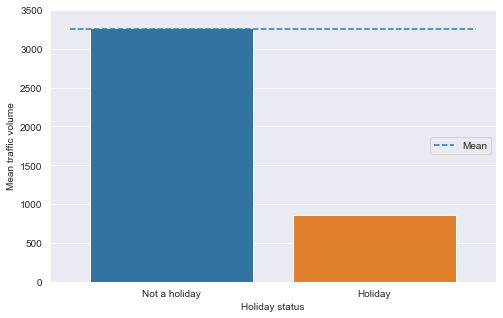

In [85]:
traffic_byholiday = df.groupby('holiday')['traffic_volume'].mean()
traffic_byholiday.rename({0:'Not a holiday', 1:'Holiday'}, inplace = True)

fig,ax = plt.subplots(figsize = (8, 5))

sns.barplot(ax=ax, x = traffic_byholiday.index, y = traffic_byholiday.values)
sns.lineplot(ax=ax, x = [-0.5,1.5], y = y_mean, label='Mean', linestyle='--')
plt.ylim(0,3500)
plt.xlabel("Holiday status")
plt.ylabel("Mean traffic volume")
plt.show()

In [86]:
traffic_byholiday

holiday
Not a holiday    3262.852170
Holiday           865.442623
Name: traffic_volume, dtype: float64

In [87]:
y_mean

3259.8183553232097

Checking for correlation

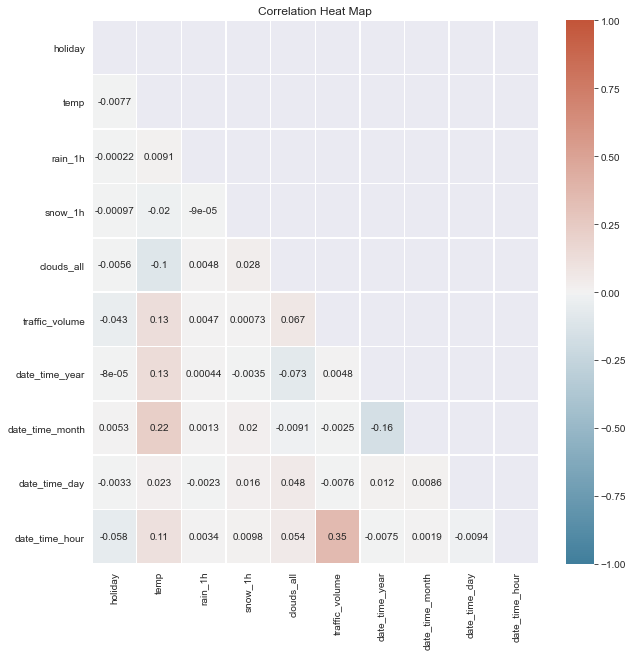

In [88]:
plt.figure(figsize=(10,10))
plt.title("Correlation Heat Map")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = sns.heatmap(corr, annot=True,linewidth=.5, mask=mask, vmax=1, vmin=-1, center=0, cmap=cmap)
plt.show()

In [89]:
df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [90]:
df['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

Using one hot encoding for categorical features 

In [91]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['weather_main','weather_description']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_ready = df.copy()
df_ready = df_ready.drop(cat_cols ,axis=1)
df_ready.reset_index(inplace=True, drop=True)
df_ready = pd.concat([df_encoded, df_ready], axis=1)

Checking the new columns

In [92]:
df_ready.columns

Index(['weather_main_Clear', 'weather_main_Clouds', 'weather_main_Drizzle',
       'weather_main_Fog', 'weather_main_Haze', 'weather_main_Mist',
       'weather_main_Rain', 'weather_main_Smoke', 'weather_main_Snow',
       'weather_main_Squall', 'weather_main_Thunderstorm',
       'weather_description_SQUALLS', 'weather_description_Sky is Clear',
       'weather_description_broken clouds', 'weather_description_drizzle',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_freezing rain', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weather_description_light intensity shower rain',
       'weather_description_light rain',
       'weather_description_light rain and snow',
       'weather_description_light shower snow',
       'weather_description_light snow'

In [93]:
df_ready.head()

,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,...,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,date_time_year,date_time_month,date_time_day,date_time_hour
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,288.28,0.0,0.0,40,5545,2012,10,2,9
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,289.36,0.0,0.0,75,4516,2012,10,2,10
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,289.58,0.0,0.0,90,4767,2012,10,2,11
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,290.13,0.0,0.0,90,5026,2012,10,2,12
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,291.14,0.0,0.0,75,4918,2012,10,2,13


Splitting the dataset into features and target

In [94]:
features = df_ready.drop(['traffic_volume'],axis=1) 
target = df_ready['traffic_volume']

In [95]:
features.columns

Index(['weather_main_Clear', 'weather_main_Clouds', 'weather_main_Drizzle',
       'weather_main_Fog', 'weather_main_Haze', 'weather_main_Mist',
       'weather_main_Rain', 'weather_main_Smoke', 'weather_main_Snow',
       'weather_main_Squall', 'weather_main_Thunderstorm',
       'weather_description_SQUALLS', 'weather_description_Sky is Clear',
       'weather_description_broken clouds', 'weather_description_drizzle',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_freezing rain', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weather_description_light intensity shower rain',
       'weather_description_light rain',
       'weather_description_light rain and snow',
       'weather_description_light shower snow',
       'weather_description_light snow'

In [96]:
target

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64

Set Training and Testing Data

In [97]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [98]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (38563, 58)
Shape of testing feature: (9641, 58)
Shape of training label: (38563,)
Shape of testing label: (9641,)


Scaling the numeric features

In [99]:
std_scaler = StandardScaler()

std_scaler.fit(x_train)

x_train_scaled = std_scaler.transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

Defining a function for model evaluation

In [100]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

    return {'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse}

### Linear Regression

In [101]:
LR = linear_model.LinearRegression()
LR.fit(x_train_scaled, y_train)

LinearRegression()

In [102]:
print('Estimated coefficients for the linear regression problem:', LR.coef_)

Estimated coefficients for the linear regression problem: [ 3.72524282e+15 -4.07406804e+15  4.48446146e+15  2.56745955e+15
 -2.41709895e+15 -2.09217250e+14  3.84702339e+15 -3.38010125e+15
  1.53566782e+15 -3.83140548e+12  2.95628729e+15  4.19733939e+13
 -7.50282836e+14  3.86932815e+15 -2.20847237e+15  2.56233642e+15
 -1.97692631e+15 -5.51645930e+13  3.13572660e+15 -7.04670786e+14
 -7.41716637e+14 -2.36843963e+14 -2.87069927e+15 -1.29357340e+14
 -1.94528072e+15 -2.17554966e+13 -3.26311291e+13 -4.24478272e+14
  1.63300992e+15 -1.39480750e+15  4.04098428e+15 -4.04817764e+14
 -1.88736733e+15 -2.44020980e+14 -5.33148949e+14  3.37701247e+15
 -2.18642432e+14 -1.99288770e+14 -1.70803097e+15 -1.08781715e+13
  3.46248561e+15 -1.66603661e+14 -7.96069464e+14 -8.13487652e+13
 -5.97377953e+14 -3.04327898e+14 -5.39305725e+14 -4.37917434e+14
 -1.56000704e+14 -4.50000000e+01  1.90000000e+02  1.18750000e+01
  6.00000000e+00  2.00500000e+02  1.71875000e+01 -4.05000000e+01
 -2.50000000e+01  6.39000000e+02

In [103]:
print('Independent term in the linear model - Intercept:', LR.intercept_)

Independent term in the linear model - Intercept: 3260.8936679436924


In [104]:
# Evaluate Model
LR_eval = evaluate_model(LR, x_test_scaled, y_test)

# Print result
print('R square:', LR_eval['r2'])
print('Mean Abs Error:', LR_eval['mae'])
print('MSE:', LR_eval['mse'])
print('RMSE:',LR_eval['rmse'])

R square: -9.950546093252062e+19
Mean Abs Error: 200906126851.40875
MSE: 3.891422972779949e+26
RMSE: 448225.5312355698


### Gradient Boosting Regression

In [105]:
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(x_train_scaled, y_train)

GradientBoostingRegressor(random_state=0)

In [106]:
# Evaluate Model
GBR_eval = evaluate_model(GBR, x_test_scaled, y_test)

# Print result
print('R square:', GBR_eval['r2'])
print('Mean Abs Error:', GBR_eval['mae'])
print('MSE:', GBR_eval['mse'])
print('RMSE:',GBR_eval['rmse'])

R square: 0.7894408045383007
Mean Abs Error: 619.0583990568564
MSE: 823447.1582473018
RMSE: 24.880884209707187


###  Hyperparameter Tuning - GradientBoostingRegressor

In [107]:
GBR.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [108]:
param_dict = {
     'criterion': ['friedman_mse'],
     'max_features': ['auto'],
     'min_samples_split': [420],
     'learning_rate': [0.5, 0.6],
     'n_estimators': [1750,1800,1850]
}

In [109]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)
gridSearch = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                           param_grid =param_dict,
                           scoring='precision',
                           cv=cv,
                           n_jobs=-1,
                           verbose=10)

In [110]:
gridSearch.fit(features, target)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.5, 0.6], 'max_features': ['auto'],
                         'min_samples_split': [420],
                         'n_estimators': [1750, 1800, 1850]},
             scoring='precision', verbose=10)

In [111]:
gridSearch.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'max_features': 'auto',
 'min_samples_split': 420,
 'n_estimators': 1750}

### Gradient Boosting Regression post tuning

In [112]:
GBR_tuned = GradientBoostingRegressor(criterion = 'friedman_mse',
    learning_rate = 0.5,
    max_features = 'auto',
    min_samples_split = 420,
    n_estimators = 1750,
    random_state = 0)

In [113]:
GBR_tuned.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_features='auto',
                          min_samples_split=420, n_estimators=1750,
                          random_state=0)

In [114]:
# Evaluate Model
GBR_tuned_eval = evaluate_model(GBR_tuned, x_test_scaled, y_test)

# Print result
print('R square:', GBR_tuned_eval['r2'])
print('Mean Abs Error:', GBR_tuned_eval['mae'])
print('MSE:', GBR_tuned_eval['mse'])
print('RMSE:',GBR_tuned_eval['rmse'])

R square: 0.8152567265161028
Mean Abs Error: 593.5996131695463
MSE: 722487.1999631621
RMSE: 24.363899793948143


### Model Comparison

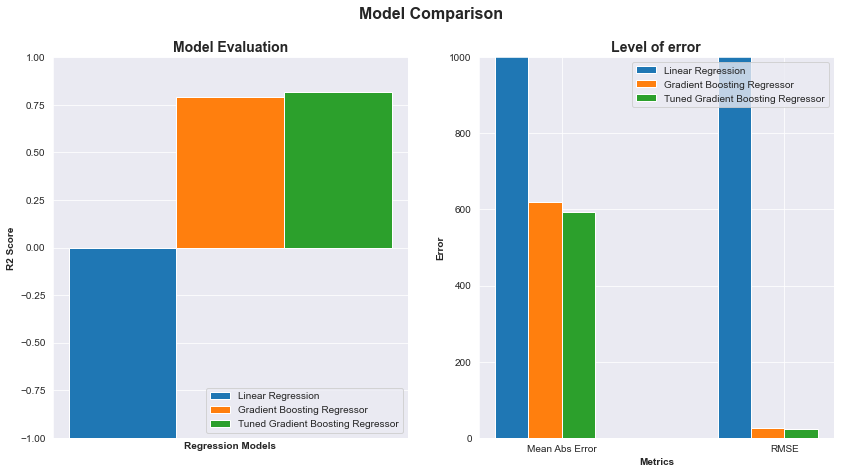

In [115]:
# Intitialize figure 
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
LR_r2 = [LR_eval['r2']]
GBR_r2 = [GBR_eval['r2']]
GBR_tuned_r2 = [GBR_tuned_eval['r2']]

r1 = np.arange(len(LR_r2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


## Make the plot
ax1.bar(r1, LR_r2, width=barWidth, edgecolor='white', label='Linear Regression')
ax1.bar(r2, GBR_r2, width=barWidth, edgecolor='white', label='Gradient Boosting Regressor')
ax1.bar(r3, GBR_tuned_r2, width=barWidth, edgecolor='white', label='Tuned Gradient Boosting Regressor')


## Configure x and y axis
ax1.set_xlabel('Regression Models', fontweight='bold')
ax1.set_xticks([])
ax1.set_ylabel('R2 Score', fontweight='bold')
ax1.set_ylim(-1, 1)

## Create legend & title
ax1.set_title('Model Evaluation', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot

## set bar size
barWidth = 0.15
LR_score = [LR_eval['mae'],LR_eval['rmse']]
GBR_score = [ GBR_eval['mae'],GBR_eval['rmse']]
GBR_tuned_score = [GBR_tuned_eval['mae'],GBR_tuned_eval['rmse']]

## Set position of bar on X axis
r1 = np.arange(len(LR_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax2.bar(r1, LR_score, width=barWidth, edgecolor='white', label='Linear Regression')
ax2.bar(r2, GBR_score, width=barWidth, edgecolor='white', label='Gradient Boosting Regressor')
ax2.bar(r3, GBR_tuned_score, width=barWidth, edgecolor='white', label='Tuned Gradient Boosting Regressor')


## Configure x and y axis
ax2.set_xlabel('Metrics', fontweight='bold')
axlabels = ['Mean Abs Error','RMSE']
ax2.set_xticks([r + (barWidth * 1.5) for r in range(len(LR_score))], )
ax2.set_xticklabels(axlabels)
ax2.set_ylabel('Error', fontweight='bold')
ax2.set_ylim(0, 1000)

## Create legend & title
ax2.set_title('Level of error', fontsize=14, fontweight='bold')
ax2.legend()

plt.show()